In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os
import geopandas as gpd
from shapely.geometry import box
from shapely.geometry import box, Polygon, MultiPolygon

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
full_rain = pd.read_csv(os.path.join(folder_path, "rain_by_day.csv"))

In [5]:
unique_trips = full_rain.groupby(['Longitude', 'Latitude', 'Decimal'])['Precipitation'].mean()
unique_trips_reset = unique_trips.reset_index()

In [6]:
def average_in_distance(arr, i, j, distance):
    rows, cols = arr.shape
    total = 0
    count = 0

    for x in range(max(0, i - distance), min(rows, i + distance + 1)):
        for y in range(max(0, j - distance), min(cols, j + distance + 1)):
            total += arr[x, y]
            count += 1

    return total / count

Re-write, so that you can give specifications-- island, and it will generate everything. So it will know the bounding box, and it will know the volcanos and plot everything.

[-1.05 -0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15 -0.05  0.05
  0.15]


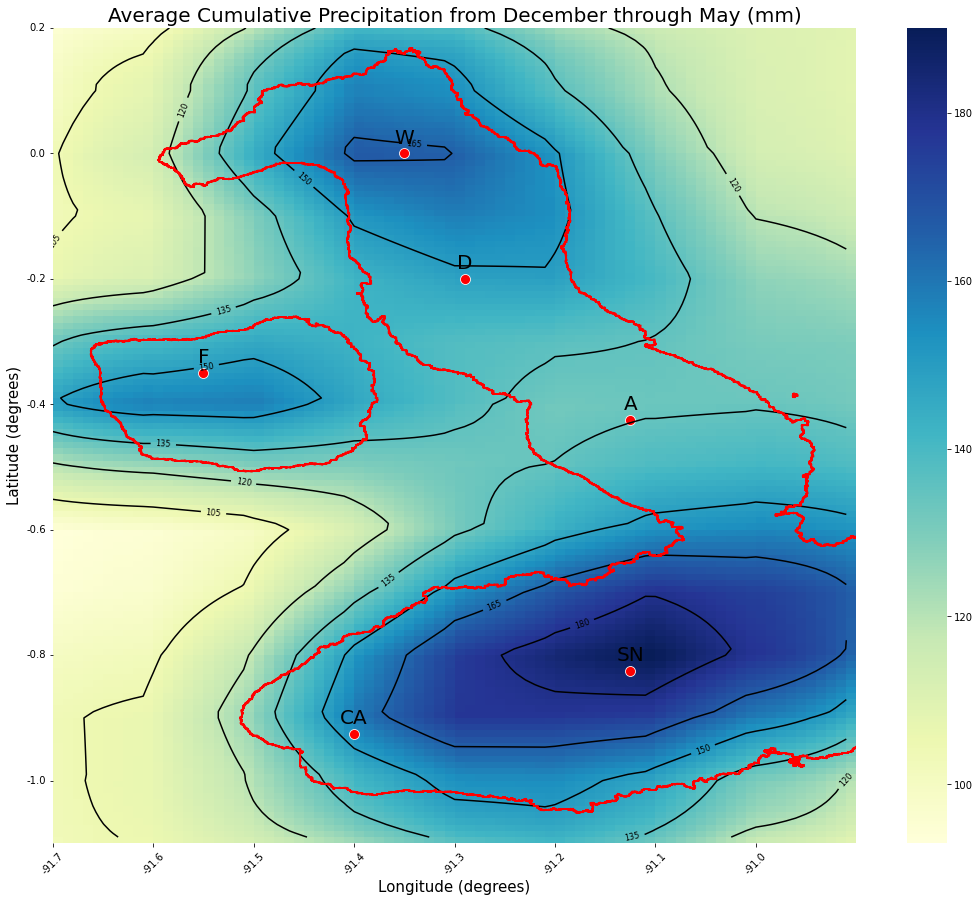

In [7]:
#Isabela island

to_plot = unique_trips_reset[(unique_trips_reset['Longitude'] <= -90.95) & (unique_trips_reset['Latitude'] <= .15) & (unique_trips_reset['Latitude'] >= -1.05) & (unique_trips_reset['Longitude'] >= -91.65)]
longs = np.array(to_plot['Longitude'].drop_duplicates())
lats = np.array(to_plot['Latitude'].drop_duplicates())
lats = lats[::-1]
data = np.zeros((len(lats), len(longs)))
for i in range(len(lats)):
    for j in range(len(longs)):
        data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] < 0.417) | (to_plot['Decimal'] >= 0.917))].sum()
        #data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] >= 0.417) & (to_plot['Decimal'] < 0.917))].sum()
granular = 10

times_ten = np.repeat(data, granular, axis=0)
times_ten = np.repeat(times_ten, granular, axis=1)

rows, cols = times_ten.shape
result_array = np.zeros_like(times_ten, dtype=float)

distance = granular
for i in range(rows):
    for j in range(cols):
        result_array[i, j] = average_in_distance(times_ten, i, j, distance)

plt.figure(figsize=(18,15))
sns.heatmap(result_array, annot=False, fmt=".2f", cmap="YlGnBu")
contour = plt.contour(result_array, colors='k')
plt.clabel(contour, inline=True, fontsize=8)

plt.title("Average Cumulative Precipitation from December through May (mm)", fontsize='20')
plt.xlabel("Longitude (degrees)", fontsize='15')
plt.ylabel("Latitude (degrees)", fontsize='15')
plt.yticks([granular*2*i for i in range(7)], [round(.2 - (.1 * 2*i), 2) for i in range(7)], rotation='horizontal')
plt.xticks([granular*i for i in range(8)], [round(-91.7 + (.1 * i), 2) for i in range(8)], rotation=45)

points = [(1.5*granular, 5.5*granular), (3.5*granular, 2*granular), (3*granular, 11.25*granular), (5.75*granular, 10.25*granular), (5.75*granular,6.25*granular), (4.1*granular,4*granular)]
labels = ['F', 'W', 'CA', 'SN', 'A', 'D']

x, y = zip(*points)

sns.scatterplot(x=x, y=y, marker='o', color='red', s=100)

for i in range(len(labels)):
    plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize='20')


shapefile_path = "/Users/jonathanquartin/Downloads/ECU_adm/ECU_adm0.shp"
gdf = gpd.read_file(shapefile_path)

minx, miny, maxx, maxy = -91.65, -1.05, -90.95, .15

# Create a bounding box geometry
bbox = box(minx, miny, maxx, maxy)

# Filter the GeoDataFrame based on the bounding box
filtered_gdf = gdf[gdf.geometry.intersects(bbox)]

for index, row in filtered_gdf.iterrows():
    geometry = row['geometry']
    coordinates = []
    if isinstance(geometry, MultiPolygon):
        for polygon in geometry.geoms:
            # Extract coordinates from each polygon
            x_coords, y_coords = polygon.exterior.xy
            coordinates.extend(list(zip(x_coords, y_coords)))
    elif isinstance(geometry, Polygon):
        # Extract coordinates from a single Polygon
        x_coords, y_coords = geometry.exterior.xy
        coordinates.extend(list(zip(x_coords, y_coords)))

    x = np.array([(i[0] + 91.7) * 100 for i in coordinates])
    y = np.array([(0.2 - i[1]) * 100 for i in coordinates])
    for i in range(len(x) - 1):
        if np.sqrt((x[i] - x[i+1])**2 + (y[i] - y[i+1])**2) < 10:
            plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='red', linestyle='-', linewidth=2)



#plt.savefig("rainy_seas_heatmap.jpg")
plt.show()

[-0.85 -0.75 -0.65 -0.55 -0.45 -0.35]


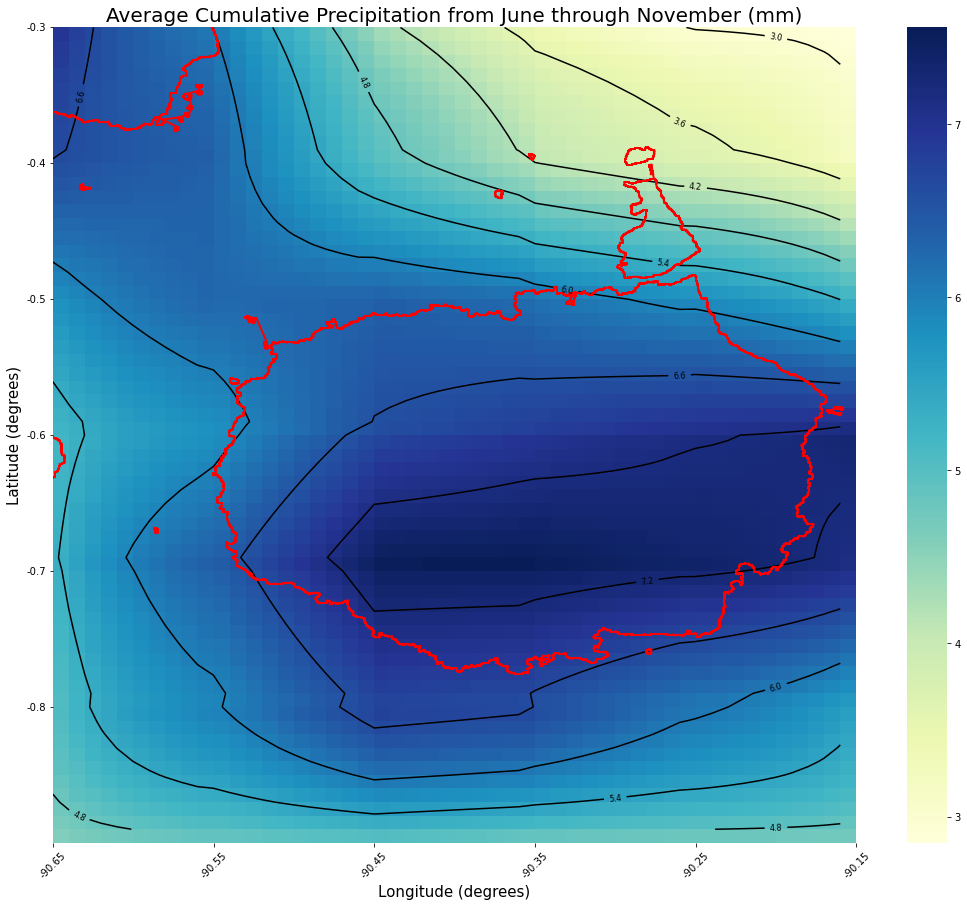

In [7]:
#Santa Cruz

to_plot = unique_trips_reset[(unique_trips_reset['Longitude'] <= -90.1) & (unique_trips_reset['Latitude'] <= -.35) & (unique_trips_reset['Latitude'] >= -.85) & (unique_trips_reset['Longitude'] >= -90.6)]
longs = np.array(to_plot['Longitude'].drop_duplicates())
lats = np.array(to_plot['Latitude'].drop_duplicates())
lats = lats[::-1]
data = np.zeros((len(lats), len(longs)))
for i in range(len(lats)):
    for j in range(len(longs)):
        data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] >= 0.417) & (to_plot['Decimal'] < 0.917))].sum()
        #data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] >= 0.417) & (to_plot['Decimal'] < 0.917))].sum()
granular = 10

times_ten = np.repeat(data, granular, axis=0)
times_ten = np.repeat(times_ten, granular, axis=1)

rows, cols = times_ten.shape
result_array = np.zeros_like(times_ten, dtype=float)

distance = granular
for i in range(rows):
    for j in range(cols):
        result_array[i, j] = average_in_distance(times_ten, i, j, distance)

plt.figure(figsize=(18,15))
sns.heatmap(result_array, annot=False, fmt=".2f", cmap="YlGnBu")
contour = plt.contour(result_array, colors='k')
plt.clabel(contour, inline=True, fontsize=8)

plt.title("Average Cumulative Precipitation from June through November (mm)", fontsize='20')
plt.xlabel("Longitude (degrees)", fontsize='15')
plt.ylabel("Latitude (degrees)", fontsize='15')
plt.yticks([granular*i for i in range(6)], [round(-.3 - (.1 *i), 2) for i in range(6)], rotation='horizontal')
plt.xticks([granular*i for i in range(6)], [round(-90.65 + (.1 * i), 2) for i in range(6)], rotation=45)

shapefile_path = "/Users/jonathanquartin/Downloads/ECU_adm/ECU_adm0.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the outline of the country

minx, miny, maxx, maxy = -90.6, -.75, -90.1, -.25

# Create a bounding box geometry
bbox = box(minx, miny, maxx, maxy)

# Filter the GeoDataFrame based on the bounding box
filtered_gdf = gdf[gdf.geometry.intersects(bbox)]

for index, row in filtered_gdf.iterrows():
    geometry = row['geometry']
    coordinates = []
    if isinstance(geometry, MultiPolygon):
        for polygon in geometry.geoms:
            # Extract coordinates from each polygon
            x_coords, y_coords = polygon.exterior.xy
            coordinates.extend(list(zip(x_coords, y_coords)))
    elif isinstance(geometry, Polygon):
        # Extract coordinates from a single Polygon
        x_coords, y_coords = geometry.exterior.xy
        coordinates.extend(list(zip(x_coords, y_coords)))

    x = np.array([(i[0] + 90.65) * 100 for i in coordinates])
    y = np.array([(-.3 - i[1]) * 100 for i in coordinates])
    for i in range(len(x) - 1):
        if np.sqrt((x[i] - x[i+1])**2 + (y[i] - y[i+1])**2) < 3:
            plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='red', linestyle='-', linewidth=2)


#plt.savefig("dry_seas_santacruz.jpg")
plt.show()